 ![conjuntodedados.jpg](conjuntodedados.jpg)
 
 Análise de Gastos públicos dos deputados da CLDF  [Trabalho de Data Science]
-----------------------------------------
#### @author: Luiz Eduardo 
### [Linkedin](www.linkedin.com/in/isweluiz)
#### Professor: Sergio Côrtes
------------------
Descrição: A transparência no trabalho dos governantes e das instituições e empresas públicas é obrigatória no Brasil. A Lei de Acesso à Informação - LAI, de 2011, garante o direito de solicitar e receber informações de órgãos públicos, de forma gratuita, para qualquer cidadão ou entidade. Esse acesso livre à informação permite que todos os cidadãos tenham a mesma capacidade de fiscalizar, monitorar, conhecer e discutir os gastos, as ações e as decisões das entidades.



> ### Índice
> Limpeza de Dados (Data Cleaning)

> Análise dos Dados (Data Analysis)

> Visualização dos Dados (Data Visualization)

> Conclusão


> ### Escopo da análise

> Extração dos dados da CLDF no link [Dados Abertos CLDF](dosabertos.cl.df.gov.br) 

> Anális dos dados (data analysis)

> Qual deputado que mais gastou? Em qual periódo do ano ele(a) mais gastou?

> Qual deputado que menos gastou neste período?

>Quais forncedores receberam os maiores valores?

In [23]:
#Importando bibiliotecas
import matplotlib.pyplot as plt # Bibilioteca util para criar gráficos
import pandas as pd # Bibilioteca para auxiliar a importar e maniular nossos dataframes
import numpy as np # Bibilioteca útil para realizar operações matemáticas
import seaborn as sns # Bibilioteca utilizada para dar um toque especial nos gráficos
#import chardet   #Trabalha com leitura de arquivos, acredito que n será necessário utiliza=lá
plt.style.use('ggplot') #Customização de gráficos , informações em https://matplotlib.org/users/style_sheets.html
#print(plt.style.available)

In [79]:
verba = pd.read_excel(r'verba_indenizatoria_2017.xlsx')
verba.head(5)  #Visualizando as primeiras colunas e linhas do nosso dataframe

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Mês,Nº Documento,Valor
0,16.0,Deputada Liliane Roriz,265.556.111-20,ESTAÇÃO NEWS E PRESTAÇÃO DE SERVIÇOS LTDA - ME,04.428.949/0001-48,2017-01-23,1.0,90,500.0
1,16.0,Deputada Liliane Roriz,265.556.111-20,ASSOCIAÇÃO COMUNITÁRIA DOS MORADORES DAS QNM 1...,2559961000166,2017-02-01,2.0,88,500.0
2,16.0,Deputada Liliane Roriz,265.556.111-20,2M PRODUÇÃO DIGITAL E COMUNICAÇÃO LTDA ME,22425647000106,2017-02-06,2.0,89,6000.0
3,16.0,Deputada Liliane Roriz,265.556.111-20,JORNAL CORREIO DE SANTA MARIA,10902694000106,2017-01-25,1.0,207,500.0
4,16.0,Deputada Liliane Roriz,265.556.111-20,SATÉLITE NOTÍCIAS EVENTOS E PUBLICIDADES LTDA,06.237.055/0001-04,2017-02-28,2.0,45,500.0


In [80]:
list(verba.columns) #Lista das colunas que possuimos em nosso dataframe

['Gabinete',
 'Nome',
 'CPF',
 'Empresa (ou Profissional)',
 'CNPJ (ou CPF)',
 'Data de Emissão',
 'Mês',
 'Nº Documento',
 'Valor']

In [18]:
#Listando o nome de cada Deputado contido na coluna nome
verba['Nome'].unique() 

array(['Deputada Liliane Roriz', 'Deputada Luzia de Paula',
       'Deputada Sandra Faraj', 'Deputada Telma Rufino',
       'Deputado Bispo Renato Andrade', 'Deputado Chico Vigilante',
       'Deputado Cláudio Abrantes', 'Deputado Cristiano Araújo',
       'Deputado Juarezão', nan, 'Deputado Wellington Luiz'], dtype=object)

In [81]:
#Contagem de linhas em cada coluna
verba.count() 

Gabinete                     1129
Nome                         1129
CPF                          1129
Empresa (ou Profissional)    1129
CNPJ (ou CPF)                1129
Data de Emissão              1116
Mês                          1116
Nº Documento                 1127
Valor                        1129
dtype: int64

In [16]:
#Contador de linhas e colunas
print('O arquivo \"verba" ' ' possui ' + str(verba.shape[0]) + ' linhas e ' +str(verba.shape[1]) + ' colunas') 

O arquivo "verba"  possui 2718 linhas e 9 colunas


In [19]:
#verificando o tipo de dados que estamos trabalhando
verba.dtypes

Gabinete                            float64
Nome                                 object
CPF                                  object
Empresa (ou Profissional)            object
CNPJ (ou CPF)                        object
Data de Emissão              datetime64[ns]
Mês                                 float64
Nº Documento                         object
Valor                               float64
dtype: object

In [20]:
#Indormação de todas as colunas númericas para vermos se há algum valor indevido
verba.describe() 

,Gabinete,Mês,Valor
count,1129.000000,1116.000000,1129.000000
mean,13.281665,6.904122,1183.480877
std,6.121873,3.353432,2425.087125
min,2.000000,1.000000,15.000000
25%,8.000000,4.000000,100.000000
50%,15.000000,7.000000,180.000000
75%,17.000000,10.000000,266.190000
max,24.000000,12.000000,11100.000000


In [21]:
# Retirando colunas que não iremos utilizar
#verba.drop(['' ], axis = 1, inplace = True)

In [84]:
verba.columns

Index(['Gabinete', 'Deputado', 'CPF', 'Fornecedor', 'CNPJ (ou CPF)', 'Data',
       'Mês', 'Nº Documento', 'Valor'],
      dtype='object')

In [83]:
#Alterando o nome de algumas colunas
verba.columns = ['Gabinete', 'Deputado', 'CPF', 'Fornecedor', 'CNPJ (ou CPF)',
       'Data', 'Mês', 'Nº Documento', 'Valor']

In [85]:
#Removendo linhas cuja o campo das colunas estão vazios
verba = verba.dropna(subset=  ['Valor'], axis=0) 
verba = verba.dropna(subset= ['Deputado'], axis=0)

In [86]:
#Criando uma coluna 
verba['Contador'] = 0

In [87]:
print(verba['Valor'].head(5))

0     500.0
1     500.0
2    6000.0
3     500.0
4     500.0
Name: Valor, dtype: float64


In [88]:
#Vai armazenar cada político e seu respectivo gasto
despesas_deputado = {}
nome_deputado = verba['Deputado'].unique()
list(nome_deputado)

['Deputada Liliane Roriz',
 'Deputada Luzia de Paula',
 'Deputada Sandra Faraj',
 'Deputada Telma Rufino',
 'Deputado Bispo Renato Andrade',
 'Deputado Chico Vigilante',
 'Deputado Cláudio Abrantes',
 'Deputado Cristiano Araújo',
 'Deputado Juarezão',
 'Deputado Wellington Luiz']

In [89]:
#Efetuando o agrupamento das despesas dos deputados e somando.
for i in nome_deputado: 
    i_nome = verba[verba['Deputado'] == i]
    total_gastos = i_nome['Valor'].sum()
    despesas_deputado[i] = total_gastos
    gastos_por_deputados = pd.DataFrame.from_dict(despesas_deputado, orient='index') 
    gastos_por_deputados.columns = ['VALOR'] #Adicionando um nome a coluna númerica
gastos_por_deputados.head(10)

,VALOR
Deputada Liliane Roriz,72890.00
Deputada Luzia de Paula,108629.92
Deputada Sandra Faraj,25504.10
Deputada Telma Rufino,81721.50
Deputado Bispo Renato Andrade,164511.46
Deputado Chico Vigilante,286759.95
Deputado Cláudio Abrantes,205399.96
Deputado Cristiano Araújo,199442.13
Deputado Juarezão,184490.89
Deputado Wellington Luiz,6800.00


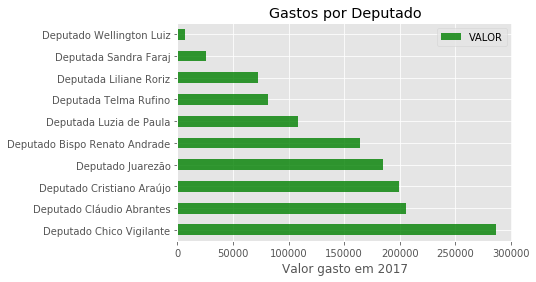

In [90]:
#Ordenando os valores do dataframe
gastos_por_deputados = gastos_por_deputados.sort_values(by = 'VALOR', ascending=False) 
gastos_por_deputados.plot(kind='barh' , color='green', grid =True, alpha=0.8) 
plt.title('Gastos por Deputado') #Titulo para o gráfico
plt.xlabel('Valor gasto em 2017') # Legenda para o eixo x
#plt.ylabel('Deputado') #Legenda para o eixo y
plt.show()

> ### Notamos que o Deputado Chico Vigilante foi o deputado que teve maiores gastos púbicos no ano de 2017
> #### Agora devemos reponder as seguintes perguntas;

> Quais foram os seus fornecedores?

> Quais fornecedores receberam os maiores valores?

> Qual o periódo do ano ele mais gastou?

In [91]:
#Conta a quantidade de linhas do arquivo, quantidade de regitros de contas lançados pelo deputado
maior_gasto = verba[verba['Deputado'] == 'Deputado Chico Vigilante'].reset_index()
maior_gasto.shape[0] 

140

In [92]:
maior_gasto.head()

,index,Gabinete,Deputado,CPF,Fornecedor,CNPJ (ou CPF),Data,Mês,Nº Documento,Valor,Contador
0,504,9.0,Deputado Chico Vigilante,297.313.721-72,GERVÁSIO VAZ DA SILVA,098.602.581-04,2017-01-30,1.0,S/N,6000.00,0
1,505,9.0,Deputado Chico Vigilante,297.313.721-72,GVT/VIVO,02.558.157/0001-62,2017-01-13,1.0,57912,786.96,0
2,506,9.0,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-01-12,1.0,20194,184.50,0
3,507,9.0,Deputado Chico Vigilante,297.313.721-72,CAESB,00.082.024/0001-37,2017-01-09,1.0,180054,145.20,0
4,508,9.0,Deputado Chico Vigilante,297.313.721-72,AUTO POSTO MILLENNIUM 2000 LTDA,03.261.491/0005-46,2017-01-19,1.0,517475,100.00,0


In [93]:
#Função que retorna um Dataframe com os valores agrupados no ano gastos pelo deputado
def gastos_fornecedor(deputado_):
    nome_deputado = verba[verba['Deputado'] == deputado_ ]
    nome_deputado = nome_deputado.groupby('Fornecedor')[['Deputado', 'Valor']].sum()
    return nome_deputado

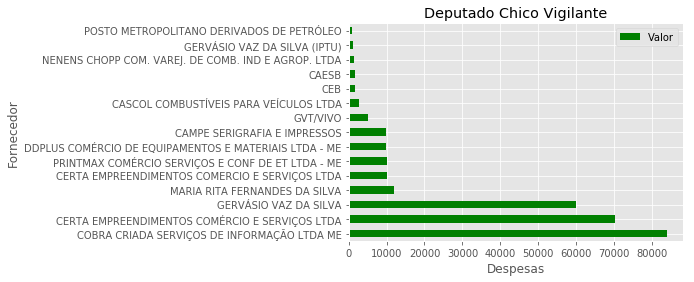

In [55]:
#Aplicando a função nos itens do Deputado Chico Vigilante
#Essa função pode ser aplicada para todos os deputados da lista
chico_vigilante = gastos_fornecedor('Deputado Chico Vigilante')
chico_vigilante = chico_vigilante.sort_values(by = 'Valor' , ascending = False)
chico_vigilante.head(15).plot(kind='barh', color= 'green', grid= True, title='Deputado Chico Vigilante')
plt.xlabel('Despesas') # Legenda para o eixo x
plt.show()

.


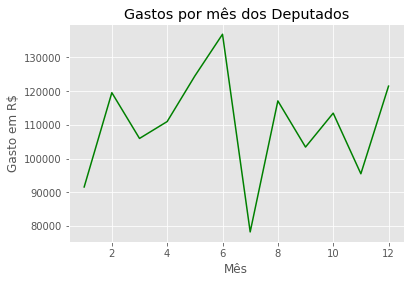

In [94]:
#Qual foi o gasto mensal do Deputado Chico Vigilante?
#mensal_deputado = verba['Fornecedor']
mensal_deputado = verba.groupby('Mês')['Valor'].sum()
mensal_deputado.plot(title = 'Gastos por mês dos Deputados' , color = 'green', grid = True)
plt.ylabel('Gasto em R$')
plt.xlabel('Mês')
plt.show()

In [100]:
#Percebemos que o mês 7 foi o menor gasto do ano, pegando valor total gasto no mês 7
mes = verba[verba['Mês'] == 5]['Valor'].sum()
verba.groupby('Mês')['Valor'].sum()

Mês
1.0      91560.86
2.0     119551.58
3.0     105969.45
4.0     110984.58
5.0     124511.45
6.0     136897.02
7.0      78226.00
8.0     117112.02
9.0     103412.78
10.0    113476.65
11.0     95483.50
12.0    121492.11
Name: Valor, dtype: float64